In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns  

Loading in the datasets

In [2]:
injury_data = pd.read_csv('InjuryRecord.csv')
pff_data = pd.read_csv('pffScoutingData.csv')
plays_data = pd.read_csv('plays.csv')
video_data = pd.read_csv('video_review.csv')

# Analyzing the Injury Data first, going through the preprocessing process first answering these questions:

Summarize the datasets using info() and describe()

Are there any duplicate rows?

Are there any duplicate values in a given column (when this would be inappropriate?)

What are the mean, median, and mode of each column?

Are there any missing or null values?

Do you want to fill in the missing value with a mean value? A value of your choice? Remove that row?
Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

Encode any categorical variables (e.g. with one-hot encoding.)

Conclusions:
Are the data usable? If not, find some new data!

Do you need to modify or correct the data in some way?

Is there any class imbalance? (Categories that have many more items than other categories).

In [3]:
# Summarizing the datasets using info() and describe()

injury_data.info()
injury_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PlayerKey  105 non-null    int64 
 1   GameID     105 non-null    object
 2   PlayKey    77 non-null     object
 3   BodyPart   105 non-null    object
 4   Surface    105 non-null    object
 5   DM_M1      105 non-null    int64 
 6   DM_M7      105 non-null    int64 
 7   DM_M28     105 non-null    int64 
 8   DM_M42     105 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.5+ KB


,PlayerKey,DM_M1,DM_M7,DM_M28,DM_M42
count,105.000000,105.0,105.000000,105.000000,105.000000
mean,42283.609524,1.0,0.723810,0.352381,0.276190
std,4163.510366,0.0,0.449257,0.480003,0.449257
min,31070.000000,1.0,0.000000,0.000000,0.000000
25%,39656.000000,1.0,0.000000,0.000000,0.000000
50%,43518.000000,1.0,1.000000,0.000000,0.000000
75%,45966.000000,1.0,1.000000,1.000000,1.000000
max,47813.000000,1.0,1.000000,1.000000,1.000000


In [4]:
# Analyzing the data overall
injury_data.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [5]:
# Finding duplicates in the injury_data dataset

injury_data.duplicated().sum()

np.int64(0)

Considering the fact that the injury_data dataset has no duplicates, we can continue the preprocess by analyzing the dataset for missing and null values, especially considering the fact that we cannot analyze the data for mean, median, and mode since all of the variables are categorical variables, even if we are considering the fact that there are some values that are integers (Which exist due to One-Hot Encoding). So we continue the analysis in the following code:

In [6]:
# Looking for null or missing values in the injury_data dataset

injury_null = injury_data.isnull().sum()
injury_na = injury_data.isna().sum()

print(injury_null)
print(injury_na)

PlayerKey     0
GameID        0
PlayKey      28
BodyPart      0
Surface       0
DM_M1         0
DM_M7         0
DM_M28        0
DM_M42        0
dtype: int64
PlayerKey     0
GameID        0
PlayKey      28
BodyPart      0
Surface       0
DM_M1         0
DM_M7         0
DM_M28        0
DM_M42        0
dtype: int64


In [7]:
# Looking at values that have NaN or null values in the injury_data dataset
injury_data[injury_data.isnull().any(axis=1)]

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
46,33337,33337-2,NaN,Foot,Natural,1,1,1,1
47,45099,45099-5,NaN,Knee,Natural,1,1,1,1
48,36591,36591-9,NaN,Knee,Natural,1,1,1,1
49,45950,45950-6,NaN,Toes,Synthetic,1,1,0,0
50,39653,39653-4,NaN,Ankle,Synthetic,1,0,0,0
51,38253,38253-10,NaN,Toes,Synthetic,1,1,1,0
52,38214,38214-12,NaN,Toes,Synthetic,1,0,0,0
53,43119,43119-12,NaN,Ankle,Synthetic,1,0,0,0
54,35648,35648-12,NaN,Ankle,Natural,1,0,0,0
55,40051,40051-13,NaN,Ankle,Natural,1,0,0,0


Although there are values that have null or NaN valuies, due to the fact that the missing data is from the PlayKey, which is a primary key that isn't relevant for analysis, I will not be replacing or removing any of the rows with missing values, as it only pertains to the PlayKey column.

# Univariable Analysis for the InjuryRecord Data

Considering the fact that the analysis will be done with mainly categorical variables due to the nature of the dataset, we will be using bar graphs to analyze the various columns.


Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If they are not useable, find some new data!

What is the overall shape of the distribution? Is it normal, skewed, bimodal, uniform, etc.?

Are there any outliers present? (Data points that are far from the others.)

If there are multiple related histograms, how does the distribution change across different groups?

What are the minimum and maximum values represented in each histogram?

How do bin sizes affect the histogram? Does changing the bin width reveal different patterns in the data?

Does the distribution appear normal, or does it have a different distribution?

/tmp/ipykernel_1877/2423711224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


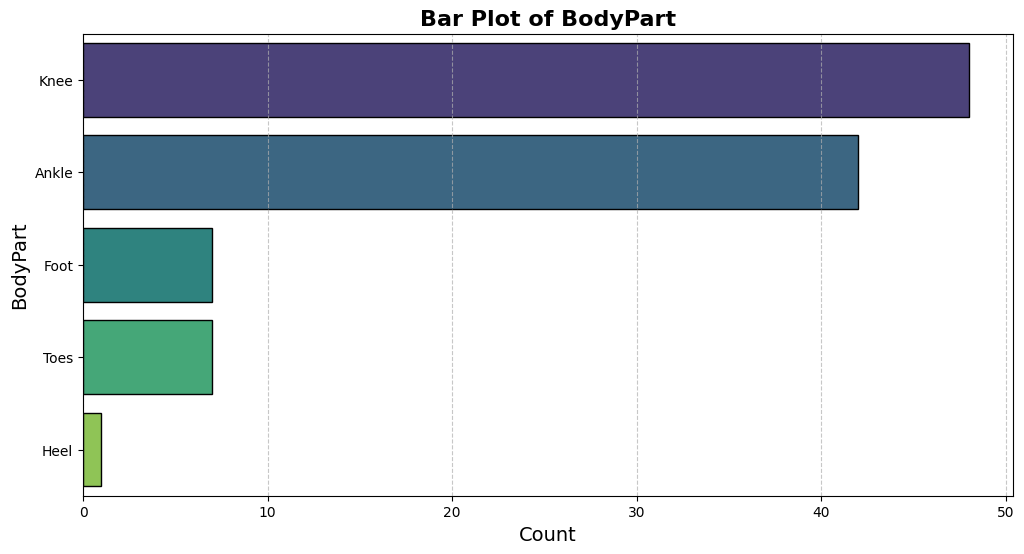

/tmp/ipykernel_1877/2423711224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


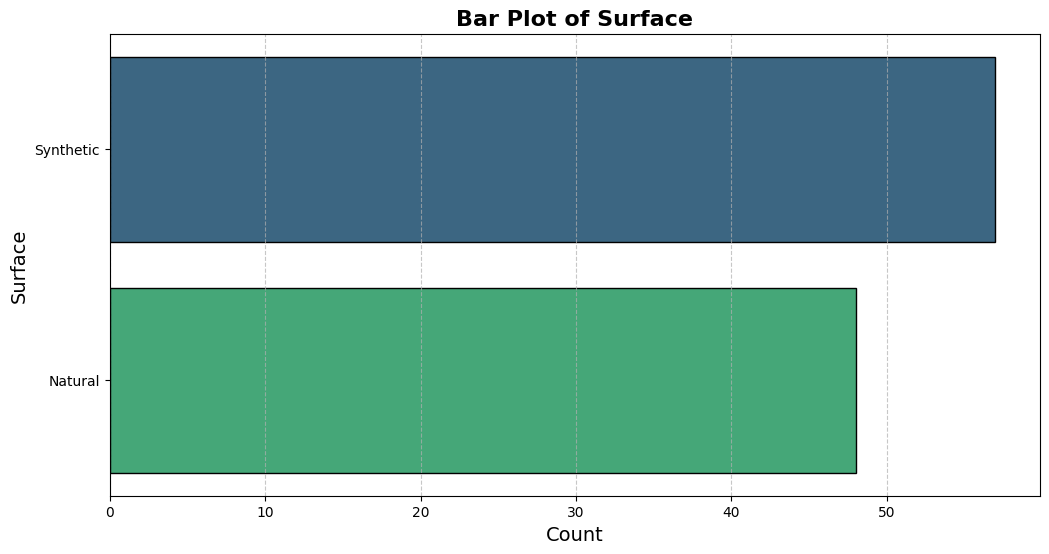

/tmp/ipykernel_1877/2423711224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


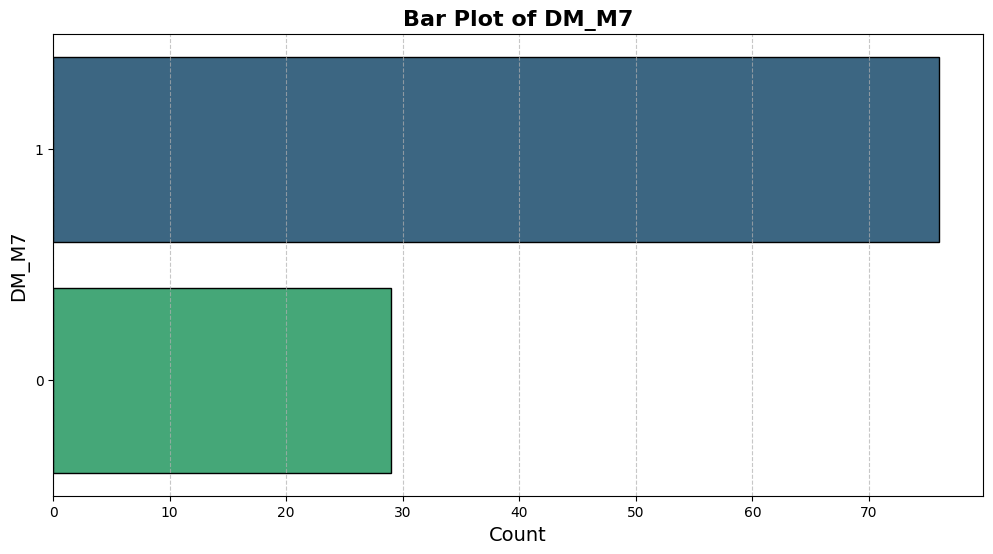

/tmp/ipykernel_1877/2423711224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


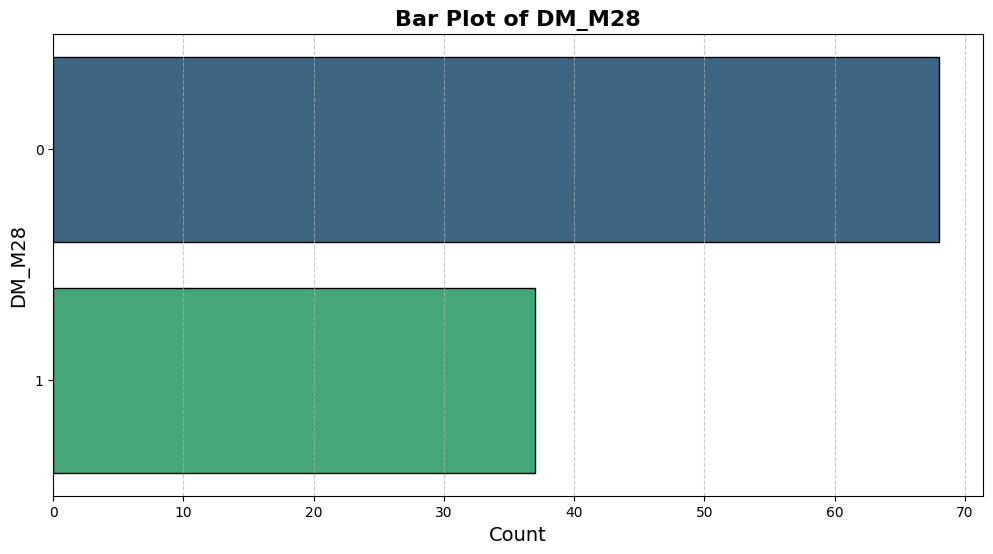

/tmp/ipykernel_1877/2423711224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


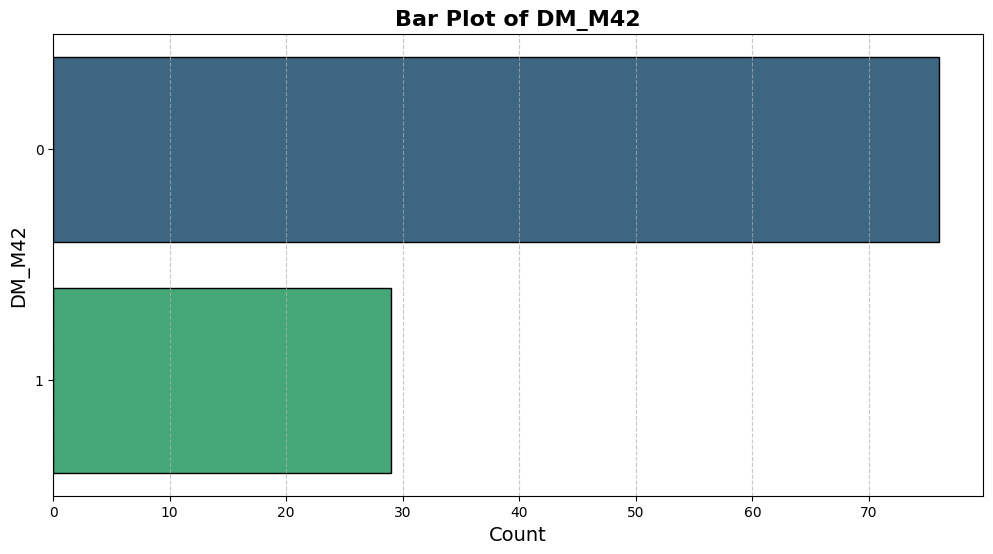

In [8]:
categorical_cols = injury_data.select_dtypes(include=['object', 'int64']).columns

categorical_cols = categorical_cols.drop(['PlayerKey', 'GameID', 'PlayKey', 'DM_M1'], errors='ignore')

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    
    ax = sns.countplot(
        y=injury_data[col], 
        order=injury_data[col].value_counts().index,
        palette="viridis",  
        edgecolor="black"  
    )


    
    plt.title(f'Bar Plot of {col}', fontsize=16, fontweight='bold')
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Light grid lines
    
    plt.show()



# Finally, I will be doing a bivariate analysis on the variables.

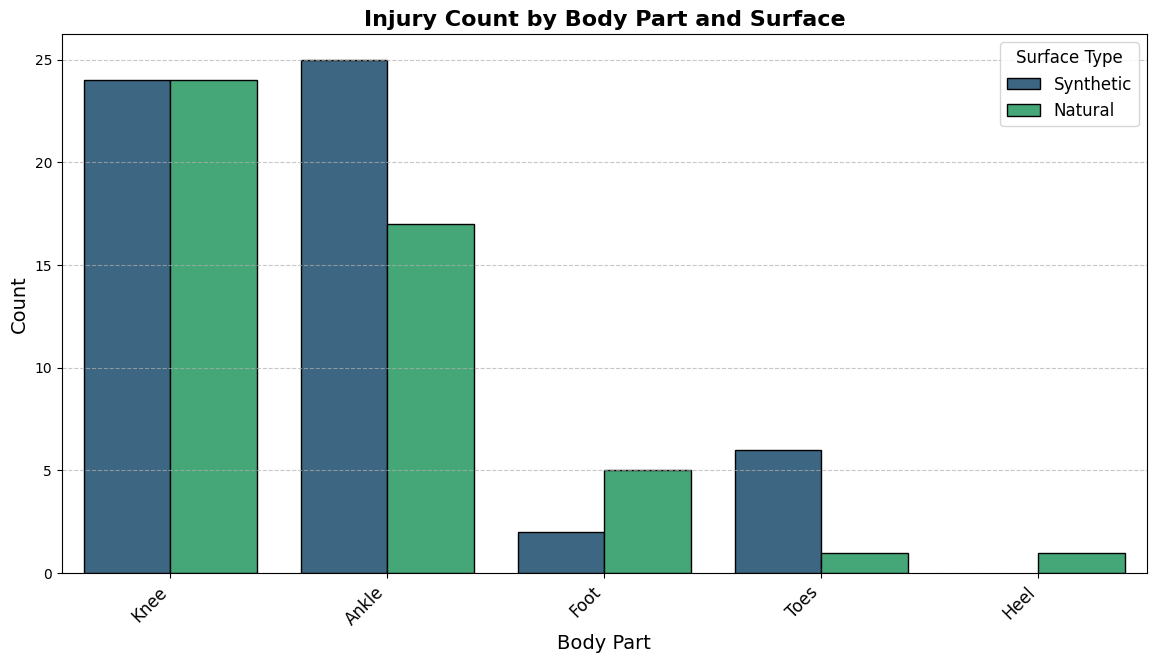

In [9]:
# Bivariate Analysis on the injury_data dataset
plt.figure(figsize=(14, 7))  # Increase figure size

# Create a count plot with hue for Surface
ax = sns.countplot(
    x='BodyPart', 
    hue='Surface', 
    data=injury_data, 
    palette='viridis', 
    edgecolor='black'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)


# Set title and labels
plt.title('Injury Count by Body Part and Surface', fontsize=16, fontweight='bold')
plt.xlabel('Body Part', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Surface Type', title_fontsize=12, fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()



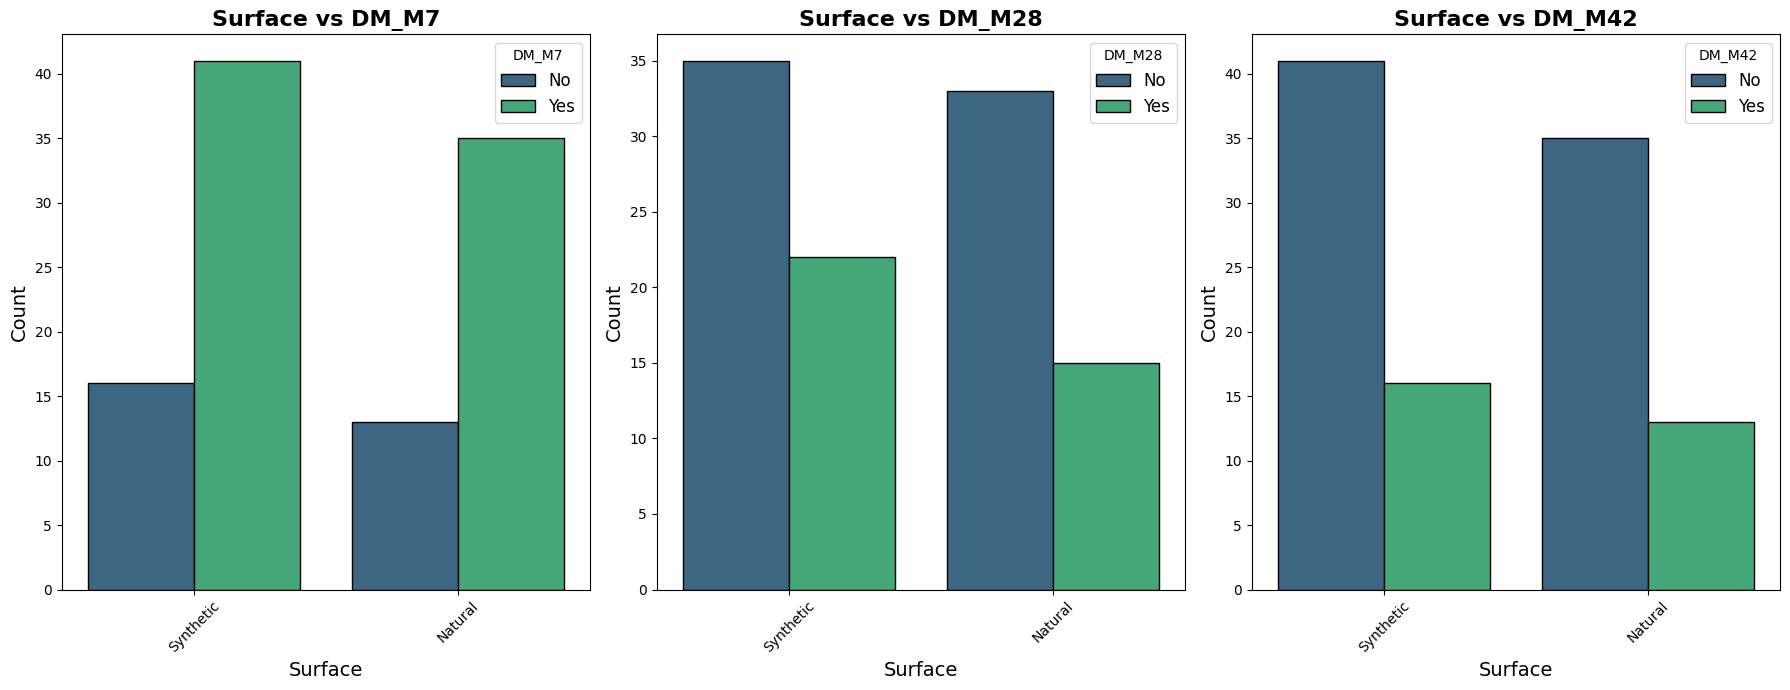

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

sns.countplot(
    x='Surface', 
    hue='DM_M7', 
    data=injury_data, 
    palette='viridis', 
    edgecolor='black', 
    hue_order=[0, 1],  
    ax=axes[0]
)
axes[0].set_title('Surface vs DM_M7', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Surface', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='DM_M7', labels=['No', 'Yes'], fontsize=12)

sns.countplot(
    x='Surface', 
    hue='DM_M28', 
    data=injury_data, 
    palette='viridis', 
    edgecolor='black', 
    hue_order=[0, 1],  
    ax=axes[1]
)
axes[1].set_title('Surface vs DM_M28', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Surface', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='DM_M28', labels=['No', 'Yes'], fontsize=12)

sns.countplot(
    x='Surface', 
    hue='DM_M42', 
    data=injury_data, 
    palette='viridis', 
    edgecolor='black', 
    hue_order=[0, 1], 
    ax=axes[2]
)
axes[2].set_title('Surface vs DM_M42', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Surface', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='DM_M42', labels=['No', 'Yes'], fontsize=12)

plt.tight_layout()
plt.show()



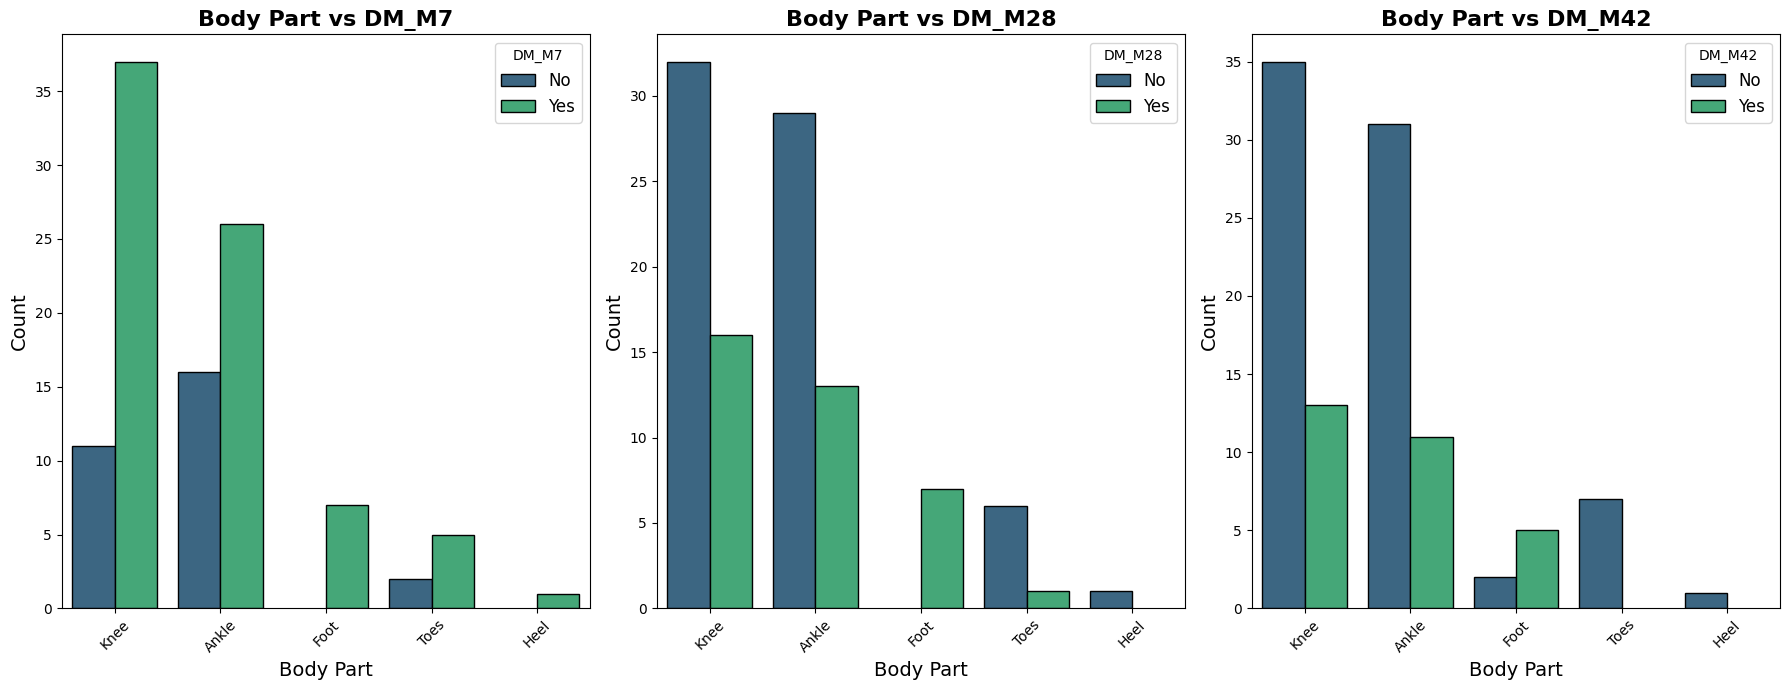

In [11]:
# Different DM_M values vs Body Part
# Set up the figure with subplots for each of the DM_M variables
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Create a count plot for DM_M7 and BodyPart
sns.countplot(
    x='BodyPart', 
    hue='DM_M7', 
    data=injury_data, 
    palette='viridis', 
    edgecolor='black', 
    hue_order=[0, 1],  # Specify order for hue values
    ax=axes[0]
)
axes[0].set_title('Body Part vs DM_M7', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Body Part', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='DM_M7', labels=['No', 'Yes'], fontsize=12)

# Create a count plot for DM_M28 and BodyPart
sns.countplot(
    x='BodyPart', 
    hue='DM_M28', 
    data=injury_data, 
    palette='viridis', 
    edgecolor='black', 
    hue_order=[0, 1],  # Specify order for hue values
    ax=axes[1]
)
axes[1].set_title('Body Part vs DM_M28', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Body Part', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='DM_M28', labels=['No', 'Yes'], fontsize=12)

# Create a count plot for DM_M42 and BodyPart
sns.countplot(
    x='BodyPart', 
    hue='DM_M42', 
    data=injury_data, 
    palette='viridis', 
    edgecolor='black', 
    hue_order=[0, 1],  # Specify order for hue values
    ax=axes[2]
)
axes[2].set_title('Body Part vs DM_M42', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Body Part', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='DM_M42', labels=['No', 'Yes'], fontsize=12)

# Adjust layout to make sure titles/labels fit
plt.tight_layout()
plt.show()


# We will be doing the same analysis for the NFL Big Data Bowl Dataset

In [12]:
pff_data.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


In [13]:
pff_data.info()
pff_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188254 entries, 0 to 188253
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gameId                  188254 non-null  int64  
 1   playId                  188254 non-null  int64  
 2   nflId                   188254 non-null  int64  
 3   pff_role                188254 non-null  object 
 4   pff_positionLinedUp     188254 non-null  object 
 5   pff_hit                 94127 non-null   float64
 6   pff_hurry               94127 non-null   float64
 7   pff_sack                94127 non-null   float64
 8   pff_beatenByDefender    48087 non-null   float64
 9   pff_hitAllowed          48087 non-null   float64
 10  pff_hurryAllowed        48087 non-null   float64
 11  pff_sackAllowed         48087 non-null   float64
 12  pff_nflIdBlockedPlayer  46526 non-null   float64
 13  pff_blockType           47904 non-null   object 
 14  pff_backFieldBlock  

,gameId,playId,nflId,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_backFieldBlock
count,1.882540e+05,188254.000000,188254.000000,94127.000000,94127.000000,94127.000000,48087.000000,48087.000000,48087.000000,48087.000000,46526.000000,47903.000000
mean,2.021098e+09,2159.218418,45723.528956,0.008956,0.030565,0.006396,0.040427,0.011313,0.043317,0.007694,45178.814340,0.041939
std,4.970192e+03,1222.723324,5016.112999,0.094212,0.172137,0.079717,0.196960,0.105760,0.203573,0.087380,4836.928925,0.200452
min,2.021091e+09,54.000000,25511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33131.000000,0.000000
25%,2.021092e+09,1127.000000,42445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42401.000000,0.000000
50%,2.021100e+09,2156.000000,45339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44877.000000,0.000000
75%,2.021102e+09,3196.000000,48053.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47832.000000,0.000000
max,2.021110e+09,5223.000000,54038.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53999.000000,1.000000


In [14]:
# Tracking duplicates in the pff_data dataset, if any
pff_data.duplicated().sum()

np.int64(0)

In [15]:
# Checking for null or missing values in the pff_data dataset
pff_null = pff_data.isnull().sum()
pff_na = pff_data.isna().sum()

print(pff_null)
print(pff_na)

gameId                         0
playId                         0
nflId                          0
pff_role                       0
pff_positionLinedUp            0
pff_hit                    94127
pff_hurry                  94127
pff_sack                   94127
pff_beatenByDefender      140167
pff_hitAllowed            140167
pff_hurryAllowed          140167
pff_sackAllowed           140167
pff_nflIdBlockedPlayer    141728
pff_blockType             140350
pff_backFieldBlock        140351
dtype: int64
gameId                         0
playId                         0
nflId                          0
pff_role                       0
pff_positionLinedUp            0
pff_hit                    94127
pff_hurry                  94127
pff_sack                   94127
pff_beatenByDefender      140167
pff_hitAllowed            140167
pff_hurryAllowed          140167
pff_sackAllowed           140167
pff_nflIdBlockedPlayer    141728
pff_blockType             140350
pff_backFieldBlock        1403

In [16]:
# Encoding the categorical columns in the pff_data dataset

columns_to_encode = [
    'pff_hit', 'pff_hurry', 'pff_sack', 'pff_beatenByDefender', 
    'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed', 'pff_backFieldBlock'
]

# Convert existing 0s to 1s
pff_data[columns_to_encode] = pff_data[columns_to_encode].replace(0, 1)

# Replace NaN values with 0
pff_data[columns_to_encode] = pff_data[columns_to_encode].fillna(0)

pff_data

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1,2021090900,97,35481,Pass Route,TE-L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2,2021090900,97,35634,Pass Route,LWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
3,2021090900,97,39985,Pass Route,HB-R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
4,2021090900,97,40151,Pass Block,C,0.0,0.0,0.0,1.0,1.0,1.0,1.0,44955.0,SW,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188249,2021110100,4433,52507,Pass Block,LT,0.0,0.0,0.0,1.0,1.0,1.0,1.0,43338.0,PP,1.0
188250,2021110100,4433,52546,Coverage,SCBoR,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
188251,2021110100,4433,52573,Pass Route,SLoWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
188252,2021110100,4433,52585,Pass Rush,LEO,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [17]:
pff_data

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1,2021090900,97,35481,Pass Route,TE-L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2,2021090900,97,35634,Pass Route,LWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
3,2021090900,97,39985,Pass Route,HB-R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
4,2021090900,97,40151,Pass Block,C,0.0,0.0,0.0,1.0,1.0,1.0,1.0,44955.0,SW,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188249,2021110100,4433,52507,Pass Block,LT,0.0,0.0,0.0,1.0,1.0,1.0,1.0,43338.0,PP,1.0
188250,2021110100,4433,52546,Coverage,SCBoR,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
188251,2021110100,4433,52573,Pass Route,SLoWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
188252,2021110100,4433,52585,Pass Rush,LEO,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [18]:
pff_data_cleaned = pff_data.dropna(subset=['pff_blockType'])
pff_data_cleaned = pff_data.dropna(subset=['pff_nflIdBlockedPlayer'])

# Check the result
pff_data_cleaned.count()

gameId                    46526
playId                    46526
nflId                     46526
pff_role                  46526
pff_positionLinedUp       46526
pff_hit                   46526
pff_hurry                 46526
pff_sack                  46526
pff_beatenByDefender      46526
pff_hitAllowed            46526
pff_hurryAllowed          46526
pff_sackAllowed           46526
pff_nflIdBlockedPlayer    46526
pff_blockType             46526
pff_backFieldBlock        46526
dtype: int64

# Univariate Analysis on the PFF Dataset

In [19]:
len(pff_data_cleaned['pff_positionLinedUp'].unique())


25

/tmp/ipykernel_1877/10172423.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


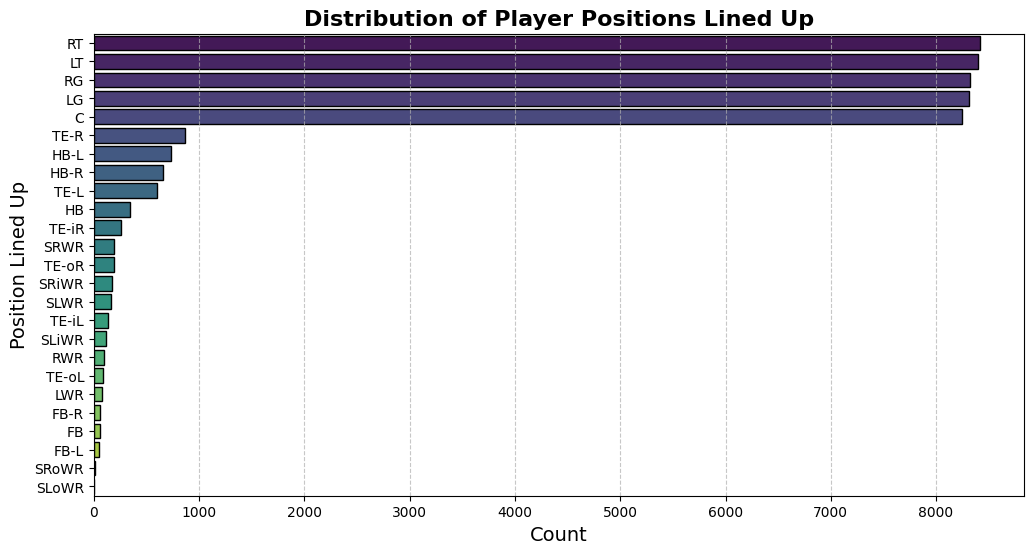

In [20]:
# Finding the frequency of each unique value in the 'pff_positionLinedUp' column
pff_data_cleaned['pff_positionLinedUp'].value_counts()

# Visualizing the frequency of each unique value in the 'pff_positionLinedUp' column
plt.figure(figsize=(12, 6)) # Increase figure size

# Create a count plot of 'pff_positionLinedUp' column
ax = sns.countplot(
    y='pff_positionLinedUp', 
    data=pff_data_cleaned, 
    palette='viridis', 
    edgecolor='black', 
    order=pff_data_cleaned['pff_positionLinedUp'].value_counts().index
)
plt.title('Distribution of Player Positions Lined Up', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Position Lined Up', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipykernel_1877/2884509023.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


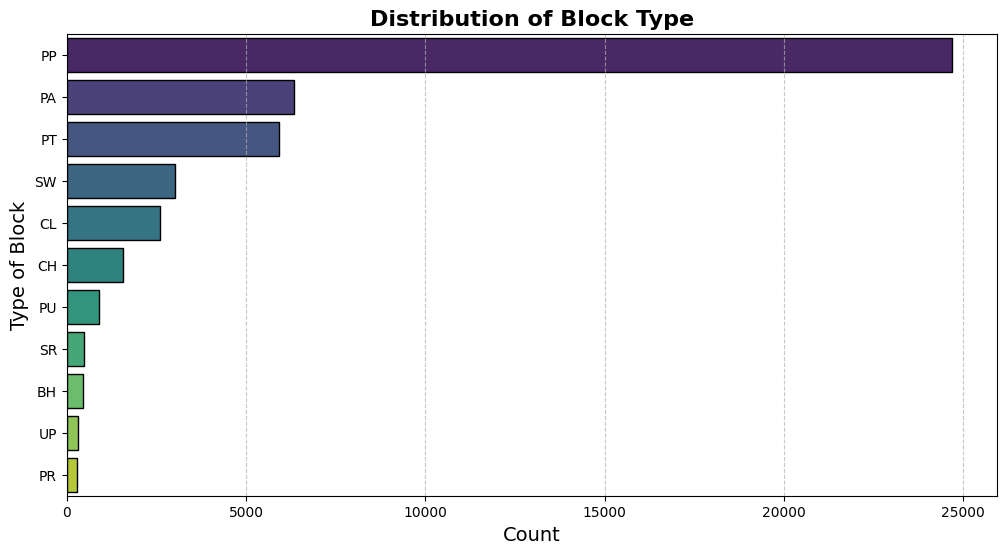

In [21]:
# Doing the same thing with the variable 'pff_blockType'
pff_data_cleaned['pff_blockType'].value_counts()

#Visualizing the frequency of each unique value in the 'pff_blockType' column
plt.figure(figsize=(12, 6)) # Increase  figure size

# Create a count plot of 'pff_blockType' column
ax = sns.countplot(
    y='pff_blockType', 
    data=pff_data_cleaned, 
    palette='viridis', 
    edgecolor='black', 
    order=pff_data_cleaned['pff_blockType'].value_counts().index
)
plt.title('Distribution of Block Type', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Type of Block', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Bivariate Analysis for the PFF Dataset


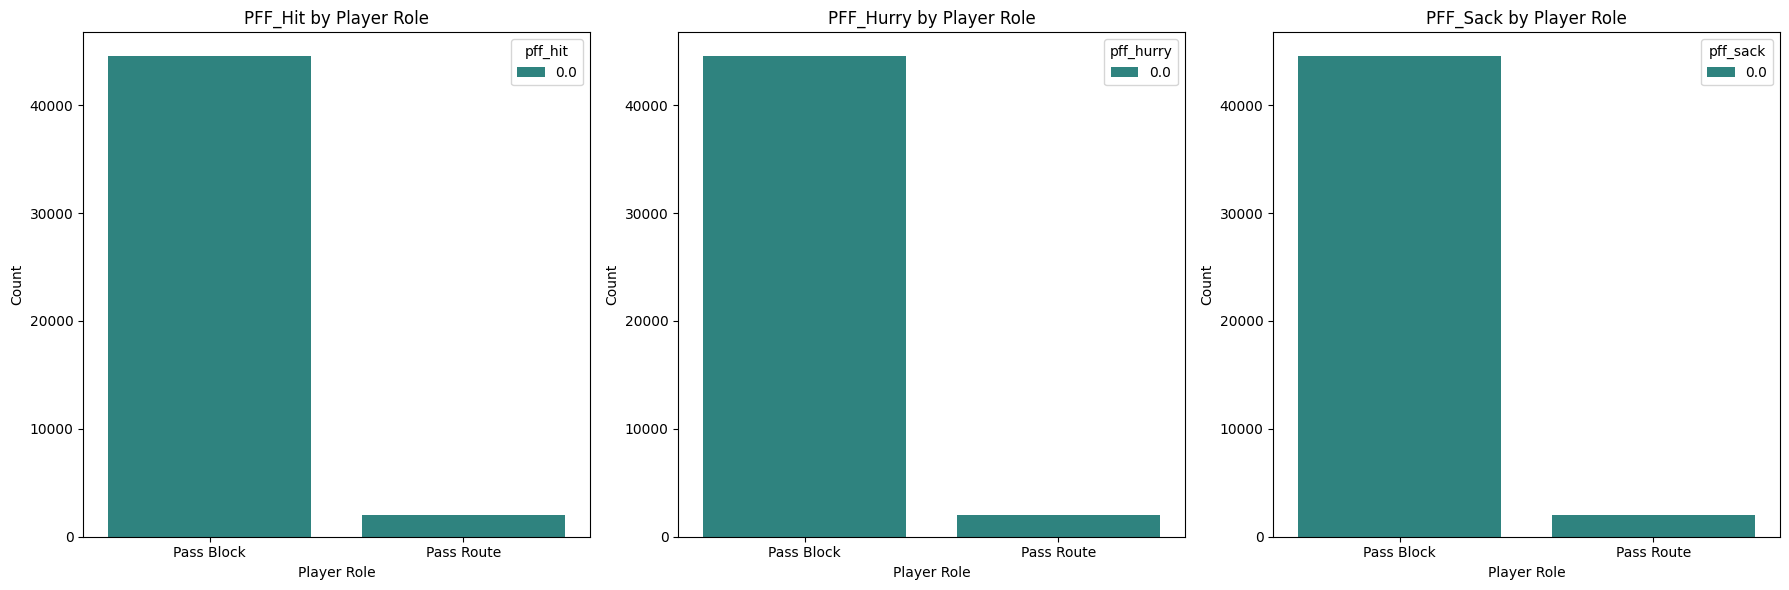

In [22]:

# Plotting the relationship between player role and injury risk (PFF_Hit, PFF_Hurry, PFF_Sack)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create subplots for each of PFF_Hit, PFF_Hurry, PFF_Sack

# PFF_Hit vs. pff_role
sns.countplot(x='pff_role', hue='pff_hit', data=pff_data_cleaned, ax=axes[0], palette='viridis')
axes[0].set_title('PFF_Hit by Player Role')
axes[0].set_xlabel('Player Role')
axes[0].set_ylabel('Count')

# PFF_Hurry vs. pff_role
sns.countplot(x='pff_role', hue='pff_hurry', data=pff_data_cleaned, ax=axes[1], palette='viridis')
axes[1].set_title('PFF_Hurry by Player Role')
axes[1].set_xlabel('Player Role')
axes[1].set_ylabel('Count')

# PFF_Sack vs. pff_role
sns.countplot(x='pff_role', hue='pff_sack', data=pff_data_cleaned, ax=axes[2], palette='viridis')
axes[2].set_title('PFF_Sack by Player Role')
axes[2].set_xlabel('Player Role')
axes[2].set_ylabel('Count')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

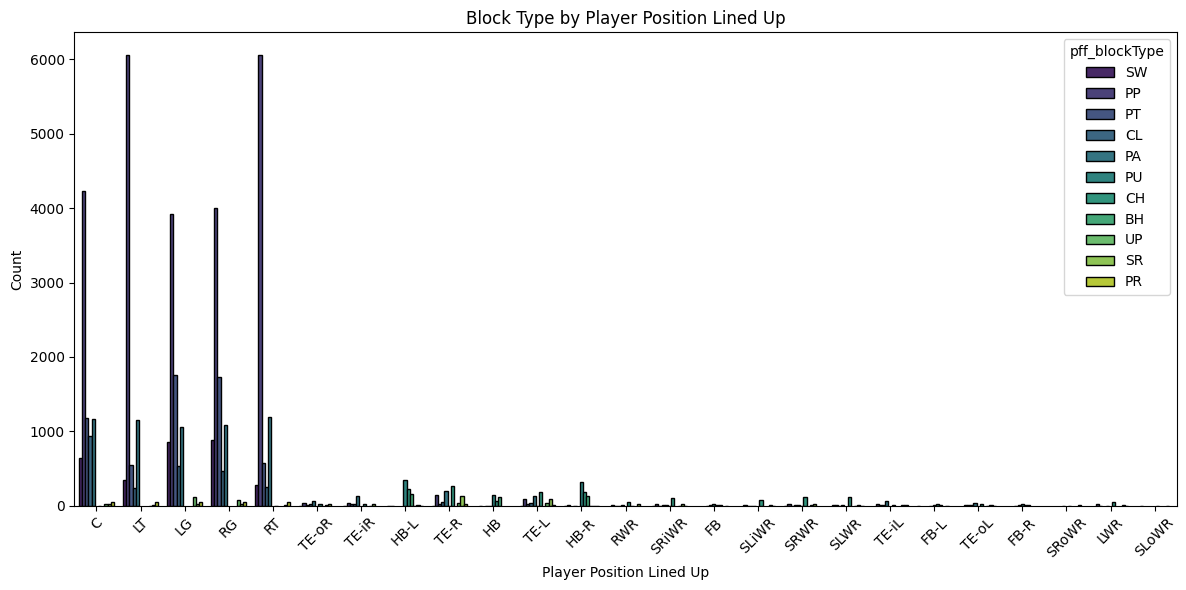

In [23]:
# Plotting the relationship between position lined up and block type
plt.figure(figsize=(12, 6))

# Create a count plot for pff_positionLinedUp vs. pff_blockType
sns.countplot(x='pff_positionLinedUp', hue='pff_blockType', data=pff_data_cleaned, palette='viridis', edgecolor='black')

# Set plot titles and labels
plt.title('Block Type by Player Position Lined Up')
plt.xlabel('Player Position Lined Up')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


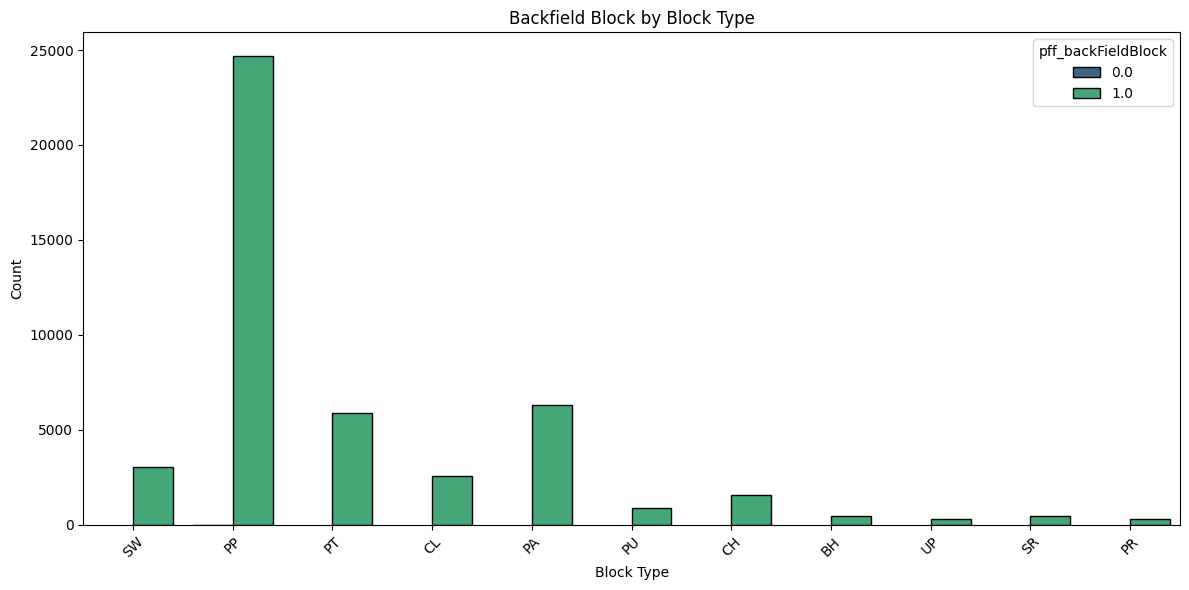

In [24]:
# Plotting the relationship between block type and backfield block
plt.figure(figsize=(12, 6))

# Create a count plot for pff_blockType vs. pff_backFieldBlock
sns.countplot(x='pff_blockType', hue='pff_backFieldBlock', data=pff_data_cleaned, palette='viridis', edgecolor='black')

# Set plot titles and labels
plt.title('Backfield Block by Block Type')
plt.xlabel('Block Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Preprocessing video_review data

In [25]:
# Finding duplicates in the video_data dataset
video_data.duplicated().sum()

np.int64(0)

In [26]:
video_data.info()
video_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Season_Year                       37 non-null     int64 
 1   GameKey                           37 non-null     int64 
 2   PlayID                            37 non-null     int64 
 3   GSISID                            37 non-null     int64 
 4   Player_Activity_Derived           37 non-null     object
 5   Turnover_Related                  37 non-null     object
 6   Primary_Impact_Type               37 non-null     object
 7   Primary_Partner_GSISID            34 non-null     object
 8   Primary_Partner_Activity_Derived  35 non-null     object
 9   Friendly_Fire                     35 non-null     object
dtypes: int64(4), object(6)
memory usage: 3.0+ KB


,Season_Year,GameKey,PlayID,GSISID
count,37.000000,37.000000,37.000000,37.000000
mean,2016.486486,323.216216,2185.675676,30642.135135
std,0.506712,183.869842,1036.877981,2685.009964
min,2016.000000,5.000000,183.000000,23564.000000
25%,2016.000000,218.000000,1262.000000,28987.000000
50%,2016.000000,296.000000,2341.000000,31313.000000
75%,2017.000000,448.000000,2918.000000,32615.000000
max,2017.000000,618.000000,3746.000000,33941.000000


In [27]:
video_data.head()

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes


In [28]:
video_null = video_data.isnull().sum()
video_na = video_data.isna().sum()

print(video_null)
print(video_na)

Season_Year                         0
GameKey                             0
PlayID                              0
GSISID                              0
Player_Activity_Derived             0
Turnover_Related                    0
Primary_Impact_Type                 0
Primary_Partner_GSISID              3
Primary_Partner_Activity_Derived    2
Friendly_Fire                       2
dtype: int64
Season_Year                         0
GameKey                             0
PlayID                              0
GSISID                              0
Player_Activity_Derived             0
Turnover_Related                    0
Primary_Impact_Type                 0
Primary_Partner_GSISID              3
Primary_Partner_Activity_Derived    2
Friendly_Fire                       2
dtype: int64


In [29]:
video_data_cleaned = video_data.dropna(subset=['Primary_Partner_Activity_Derived'])
video_data_cleaned = video_data.dropna(subset=['Friendly_Fire'])
video_data_cleaned = video_data_cleaned[video_data_cleaned['Primary_Impact_Type'] != 'Unclear']


In [30]:
video_data_cleaned

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes
5,2016,60,905,30786,Blocking,No,Helmet-to-helmet,29815,Blocked,No
6,2016,144,2342,32410,Blocking,No,Helmet-to-body,23259,Blocked,No
7,2016,149,3663,28128,Blocking,No,Helmet-to-body,29629,Blocked,No
8,2016,189,3509,27595,Tackled,No,Helmet-to-helmet,31950,Tackling,No
10,2016,231,1976,32214,Blocked,No,Helmet-to-helmet,32807,Blocked,Yes


In [31]:
# Replace 'Yes' with 1 and 'No' with 0 in 'Turnover_Related' column
video_data_cleaned['Turnover_Related'] = video_data_cleaned['Turnover_Related'].replace({'Yes': 1, 'No': 0})

# Replace 'Yes' with 1 and 'No' with 0 in 'Friendly_Fire' column
video_data_cleaned['Friendly_Fire'] = video_data_cleaned['Friendly_Fire'].replace({'Yes': 1, 'No': 0})

video_data_cleaned


/tmp/ipykernel_1877/3105745655.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  video_data_cleaned['Turnover_Related'] = video_data_cleaned['Turnover_Related'].replace({'Yes': 1, 'No': 0})
/tmp/ipykernel_1877/3105745655.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  video_data_cleaned['Friendly_Fire'] = video_data_cleaned['Friendly_Fire'].replace({'Yes': 1, 'No': 0})


,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,0,Helmet-to-body,32482,Tackled,0
1,2016,21,2587,29343,Blocked,0,Helmet-to-helmet,31059,Blocking,0
2,2016,29,538,31023,Tackling,0,Helmet-to-body,31941,Tackled,0
3,2016,45,1212,33121,Tackling,0,Helmet-to-body,28249,Tackled,0
4,2016,54,1045,32444,Blocked,0,Helmet-to-body,31756,Blocked,1
5,2016,60,905,30786,Blocking,0,Helmet-to-helmet,29815,Blocked,0
6,2016,144,2342,32410,Blocking,0,Helmet-to-body,23259,Blocked,0
7,2016,149,3663,28128,Blocking,0,Helmet-to-body,29629,Blocked,0
8,2016,189,3509,27595,Tackled,0,Helmet-to-helmet,31950,Tackling,0
10,2016,231,1976,32214,Blocked,0,Helmet-to-helmet,32807,Blocked,1


/tmp/ipykernel_1877/218559864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


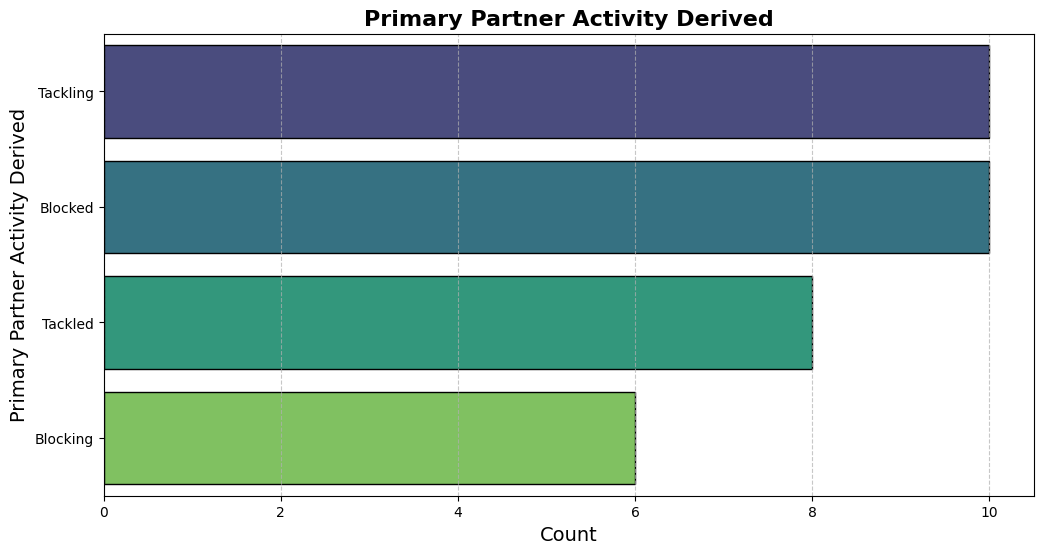

In [32]:
# Visualizing the count for player_activity_derived
plt.figure(figsize=(12, 6))

# Create a count plot for 'Primary_Partner_Activity_Derived' column
ax = sns.countplot(
    y='Primary_Partner_Activity_Derived', 
    data=video_data_cleaned, 
    palette='viridis', 
    edgecolor='black', 
    order=video_data_cleaned['Primary_Partner_Activity_Derived'].value_counts().index
)
plt.title('Primary Partner Activity Derived', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)

plt.ylabel('Primary Partner Activity Derived', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_1877/2174962644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


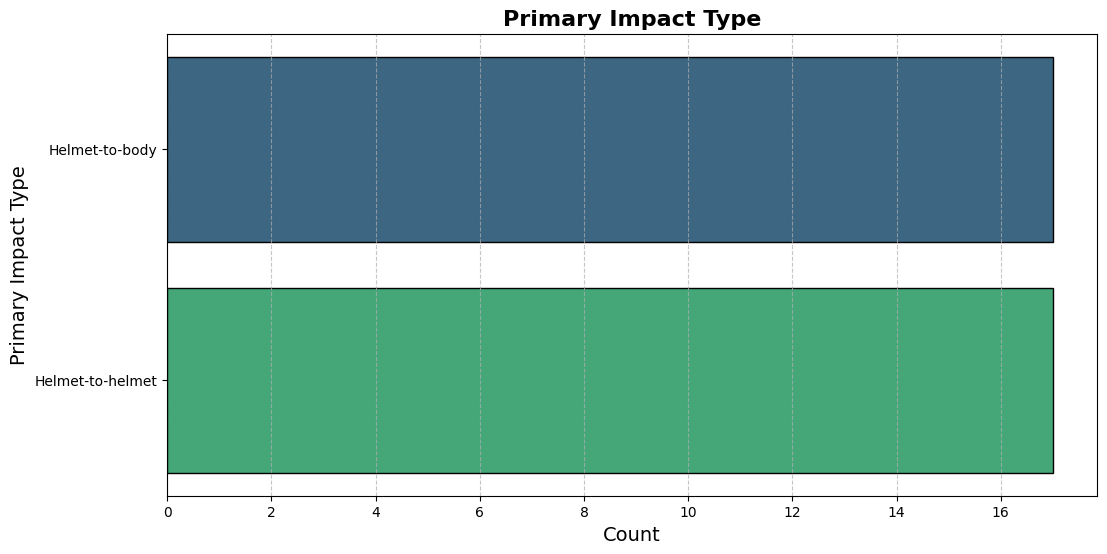

In [33]:
# Visualizing the count for primary_impact_type
plt.figure(figsize=(12, 6))

# Create a count plot for 'Primary_Impact_Type' column
ax = sns.countplot(
    y='Primary_Impact_Type', 
    data=video_data_cleaned, 
    palette='viridis', 
    edgecolor='black', 
    order=video_data_cleaned['Primary_Impact_Type'].value_counts().index
)
plt.title('Primary Impact Type', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)

plt.ylabel('Primary Impact Type', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_1877/2070208388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


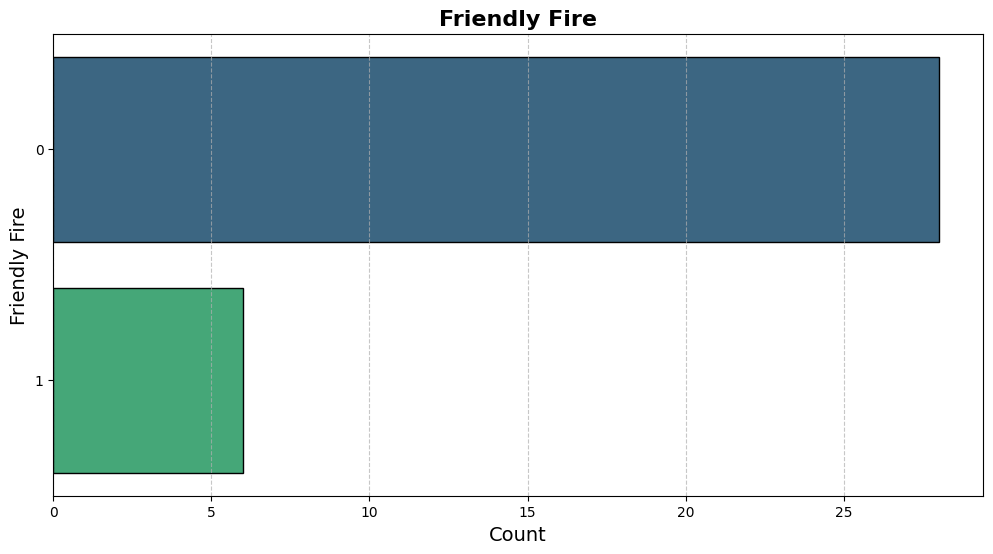

In [34]:
# Same thing for friendly fire
plt.figure(figsize=(12, 6))

# Create a count plot for 'Friendly_Fire' column
ax = sns.countplot(
    y='Friendly_Fire', 
    data=video_data_cleaned, 
    palette='viridis', 
    edgecolor='black', 
    order=video_data_cleaned['Friendly_Fire'].value_counts().index
)
plt.title('Friendly Fire', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)

plt.ylabel('Friendly Fire', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Bivariate Analysis for the Video Data

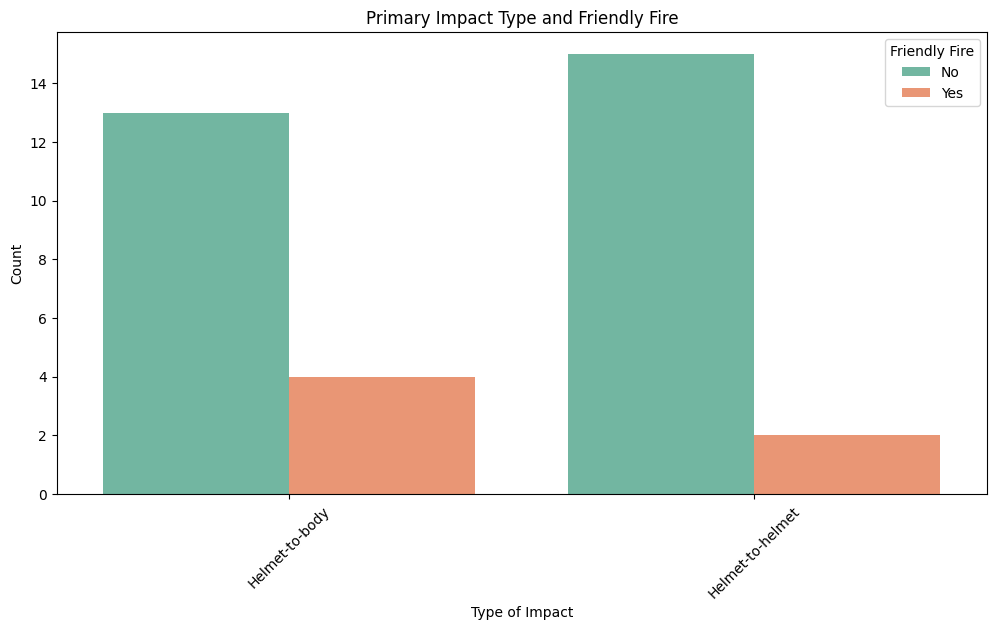

In [35]:
# Convert 'Friendly_Fire' to 1 and 0 for easier analysis
video_data_cleaned['Friendly_Fire'] = video_data_cleaned['Friendly_Fire'].replace({'Yes': 1, 'No': 0})

# Bivariate analysis between Primary_Impact_Type and Friendly_Fire
plt.figure(figsize=(12, 6))

sns.countplot(
    x='Primary_Impact_Type', 
    hue='Friendly_Fire', 
    data=video_data_cleaned, 
    palette='Set2', 
    order=video_data_cleaned['Primary_Impact_Type'].value_counts().index
)

plt.title('Primary Impact Type and Friendly Fire')
plt.xlabel('Type of Impact')
plt.ylabel('Count')
plt.legend(title='Friendly Fire', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


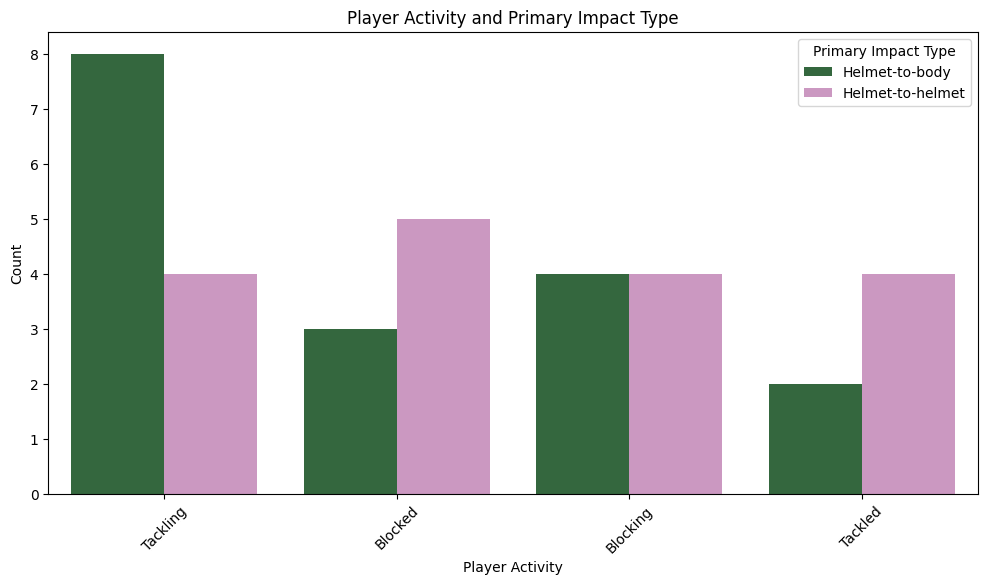

In [36]:
# Bivariate analysis between Player_Activity_Derived and Primary_Impact_Type
plt.figure(figsize=(12, 6))

sns.countplot(
    x='Player_Activity_Derived', 
    hue='Primary_Impact_Type', 
    data=video_data_cleaned, 
    palette='cubehelix', 
    order=video_data_cleaned['Player_Activity_Derived'].value_counts().index
)

plt.title('Player Activity and Primary Impact Type')
plt.xlabel('Player Activity')
plt.ylabel('Count')
plt.legend(title='Primary Impact Type', loc='upper right')
plt.xticks(rotation=45)
plt.show()


## Capstone Proposal Coding ##



# Injury Dataset

In [37]:
# Showing the injury dataset
injury_data

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1
...,...,...,...,...,...,...,...,...,...
100,44423,44423-13,NaN,Knee,Synthetic,1,0,0,0
101,31933,31933-20,NaN,Knee,Synthetic,1,0,0,0
102,47285,47285-4,NaN,Knee,Natural,1,1,0,0
103,37068,37068-19,NaN,Knee,Natural,1,1,0,0


# Working on Injury Dataset

Explained variance ratio: [0.7147092  0.23254384 0.05274695 0.        ]


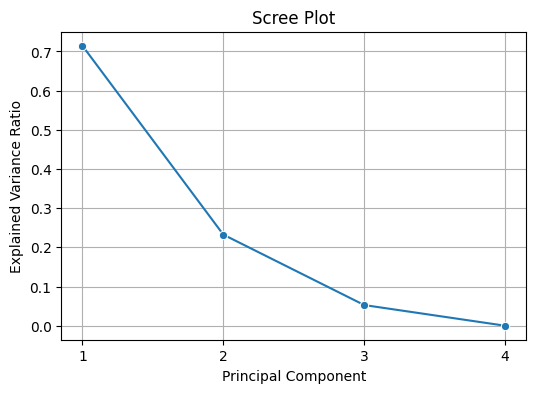

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your cleaned dataframe is called df_clean
# And you want to run PCA on DM_M columns
dm_columns = ['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']
X = injury_data[dm_columns]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(X_scaled)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Plot Scree plot
plt.figure(figsize=(6,4))
sns.lineplot(x=range(1, len(explained_variance)+1), y=explained_variance, marker="o")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.show()


In [39]:
from statsmodels.multivariate.manova import MANOVA
import pandas as pd

# Ensure the data has no missing values in relevant columns
df_clean = injury_data.dropna(subset=['Surface', 'BodyPart', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'])

# Perform MANOVA
manova = MANOVA.from_formula('DM_M1 + DM_M7 + DM_M28 + DM_M42 ~ Surface + BodyPart', data=df_clean)
print(manova.mv_test())


                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF        F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 4.0000 96.0000 -7205759403792818.0000 1.0000
         Pillai's trace                1.0000 4.0000 96.0000 -7205759403792817.0000 1.0000
 Hotelling-Lawley trace -300239975158034.0625 4.0000 96.0000 -7205759403792818.0000 1.0000
    Roy's greatest root -300239975158034.0625 4.0000 96.0000 -7205759403792818.0000 1.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Prepare the data
# Convert categorical variables ('Surface', 'BodyPart') into numerical values
label_encoder_surface = LabelEncoder()
injury_data['Surface_encoded'] = label_encoder_surface.fit_transform(injury_data['Surface'])

label_encoder_bodypart = LabelEncoder()
injury_data['BodyPart_encoded'] = label_encoder_bodypart.fit_transform(injury_data['BodyPart'].fillna('Unknown'))

# Define features (X) and target variable (y)
# Using 'Surface_encoded' and DM_M columns as features, and 'BodyPart_encoded' as target
X = injury_data[['BodyPart_encoded', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']]
y = injury_data['Surface_encoded']  # Target variable: body part (or injury type)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Feature Importance (optional)
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)


Accuracy Score: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.50      0.50      0.50        12

    accuracy                           0.43        21
   macro avg       0.42      0.42      0.42        21
weighted avg       0.43      0.43      0.43        21

Feature Importance:
             Feature  Importance
0  BodyPart_encoded    0.647718
2             DM_M7    0.130852
3            DM_M28    0.123643
4            DM_M42    0.097787
1             DM_M1    0.000000


# PFF Data

In [41]:
pff_data_cleaned

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
4,2021090900,97,40151,Pass Block,C,0.0,0.0,0.0,1.0,1.0,1.0,1.0,44955.0,SW,1.0
7,2021090900,97,42377,Pass Block,LT,0.0,0.0,0.0,1.0,1.0,1.0,1.0,42403.0,PP,1.0
9,2021090900,97,42404,Pass Block,LG,0.0,0.0,0.0,1.0,1.0,1.0,1.0,44955.0,PP,1.0
16,2021090900,97,46163,Pass Block,RG,0.0,0.0,0.0,1.0,1.0,1.0,1.0,53441.0,SW,1.0
18,2021090900,97,52421,Pass Block,RT,0.0,0.0,0.0,1.0,1.0,1.0,1.0,53441.0,PP,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188238,2021110100,4433,43425,Pass Route,HB-R,0.0,0.0,0.0,1.0,1.0,1.0,1.0,43326.0,CH,1.0
188239,2021110100,4433,43695,Pass Block,LG,0.0,0.0,0.0,1.0,1.0,1.0,1.0,43338.0,SW,1.0
188240,2021110100,4433,44835,Pass Route,SLiWR,0.0,0.0,0.0,1.0,1.0,1.0,1.0,42406.0,CH,1.0
188242,2021110100,4433,46103,Pass Block,RG,0.0,0.0,0.0,1.0,1.0,1.0,1.0,43326.0,PP,1.0


In [42]:
pff_data['pff_sackAllowed'].unique()

array([0., 1.])

[0.98321178 0.29349288]


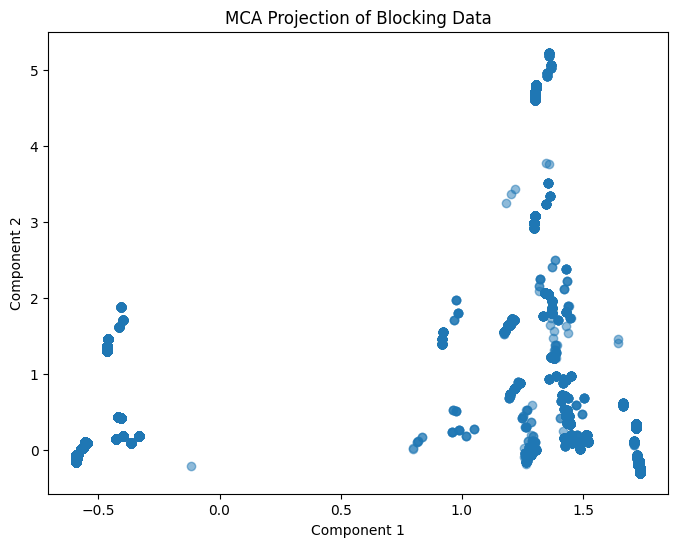

In [43]:
import pandas as pd
import prince

# Load your data (assuming it's called 'block_data')
# block_data = pd.read_csv('your_dataset.csv')

# Subset relevant categorical variables
mca_data = pff_data[['pff_positionLinedUp', 'pff_blockType', 
                       'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed']]

# Convert to string type to treat numerics as categories
mca_data = mca_data.astype(str)

# Run MCA
mca = prince.MCA(n_components=2, random_state=42)
mca = mca.fit(mca_data)

# Get the coordinates for plotting
mca_coords = mca.transform(mca_data)

# Access the eigenvalues (which represent the inertia / variance explained)
print(mca.eigenvalues_)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(mca_coords[0], mca_coords[1], alpha=0.5)
plt.title('MCA Projection of Blocking Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


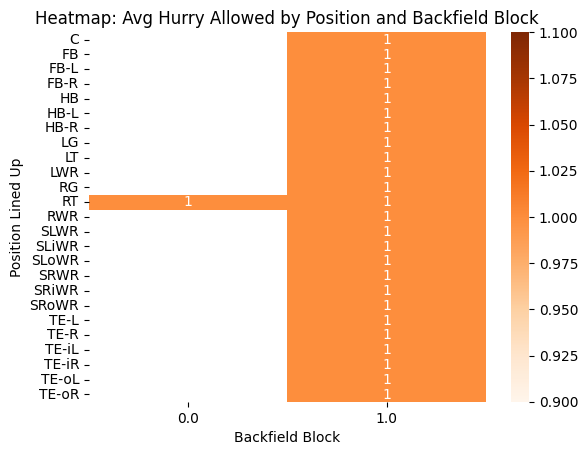

In [44]:
pivot = pff_data_cleaned.pivot_table(
    values='pff_hurryAllowed',
    index='pff_positionLinedUp',
    columns='pff_backFieldBlock',
    aggfunc='mean'
)

sns.heatmap(pivot, annot=True, cmap='Oranges')
plt.title("Heatmap: Avg Hurry Allowed by Position and Backfield Block")
plt.ylabel("Position Lined Up")
plt.xlabel("Backfield Block")
plt.show()


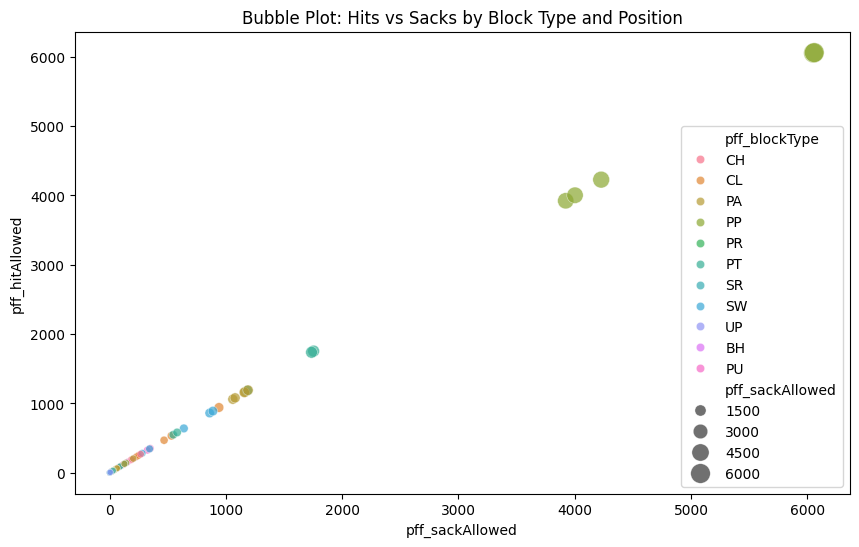

In [45]:
grouped = pff_data_cleaned.groupby(['pff_positionLinedUp', 'pff_blockType'])[
    ['pff_sackAllowed', 'pff_hitAllowed']].sum().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=grouped,
    x='pff_sackAllowed',
    y='pff_hitAllowed',
    size='pff_sackAllowed',
    hue='pff_blockType',
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Bubble Plot: Hits vs Sacks by Block Type and Position")
plt.show()


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27972
         1.0       1.00      1.00      1.00      9679

    accuracy                           1.00     37651
   macro avg       1.00      1.00      1.00     37651
weighted avg       1.00      1.00      1.00     37651



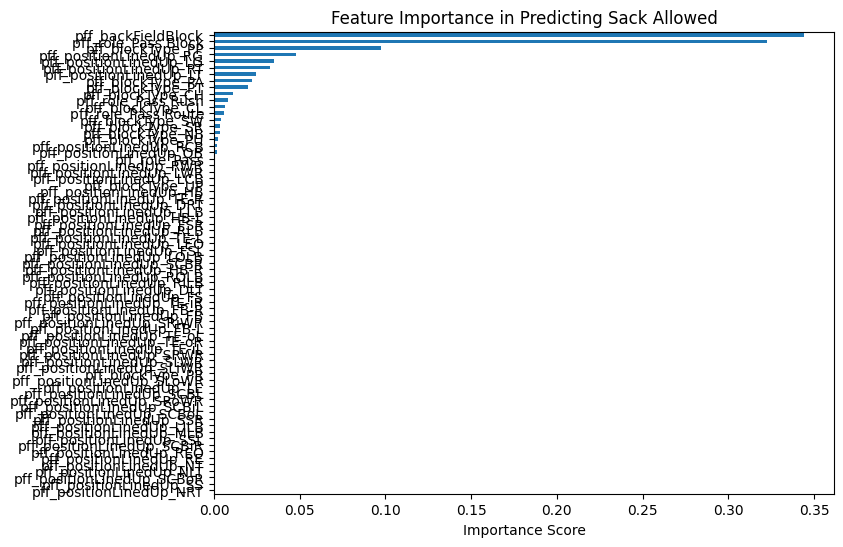

In [46]:
# Step 1: Select features and target
features = ['pff_positionLinedUp', 'pff_blockType', 'pff_backFieldBlock', 'pff_role']
target = 'pff_hitAllowed'

# Drop any missing rows in relevant columns
rf_data = pff_data

# Encode categorical features
X = pd.get_dummies(rf_data[features], drop_first=True)
y = rf_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind='barh')
plt.title('Feature Importance in Predicting Sack Allowed')
plt.xlabel('Importance Score')
plt.show()

In [47]:
# Display feature importances as a sorted list
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Feature Importances (Descending):\n")
for feature, importance in importances.items():
    print(f"{feature}: {importance:.4f}")


Feature Importances (Descending):

pff_backFieldBlock: 0.3443
pff_role_Pass Block: 0.3226
pff_blockType_PP: 0.0975
pff_positionLinedUp_RG: 0.0476
pff_positionLinedUp_LG: 0.0351
pff_positionLinedUp_RT: 0.0328
pff_positionLinedUp_LT: 0.0247
pff_blockType_PA: 0.0222
pff_blockType_PT: 0.0200
pff_blockType_CH: 0.0110
pff_role_Pass Rush: 0.0083
pff_blockType_CL: 0.0066
pff_role_Pass Route: 0.0060
pff_blockType_SW: 0.0040
pff_blockType_SR: 0.0034
pff_blockType_NB: 0.0033
pff_blockType_PU: 0.0026
pff_positionLinedUp_RCB: 0.0016
pff_positionLinedUp_QB: 0.0015
pff_role_Pass: 0.0006
pff_positionLinedUp_RWR: 0.0005
pff_positionLinedUp_LWR: 0.0005
pff_positionLinedUp_LCB: 0.0004
pff_blockType_UP: 0.0003
pff_positionLinedUp_HB: 0.0003
pff_positionLinedUp_TE-R: 0.0003
pff_positionLinedUp_DRT: 0.0002
pff_positionLinedUp_LLB: 0.0002
pff_positionLinedUp_HB-L: 0.0002
pff_positionLinedUp_FSR: 0.0002
pff_positionLinedUp_RLB: 0.0001
pff_positionLinedUp_TE-L: 0.0001
pff_positionLinedUp_LEO: 0.0001
pff_positi

# Video Data Multivariate Analysis


In [48]:
video_data_cleaned

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,0,Helmet-to-body,32482,Tackled,0
1,2016,21,2587,29343,Blocked,0,Helmet-to-helmet,31059,Blocking,0
2,2016,29,538,31023,Tackling,0,Helmet-to-body,31941,Tackled,0
3,2016,45,1212,33121,Tackling,0,Helmet-to-body,28249,Tackled,0
4,2016,54,1045,32444,Blocked,0,Helmet-to-body,31756,Blocked,1
5,2016,60,905,30786,Blocking,0,Helmet-to-helmet,29815,Blocked,0
6,2016,144,2342,32410,Blocking,0,Helmet-to-body,23259,Blocked,0
7,2016,149,3663,28128,Blocking,0,Helmet-to-body,29629,Blocked,0
8,2016,189,3509,27595,Tackled,0,Helmet-to-helmet,31950,Tackling,0
10,2016,231,1976,32214,Blocked,0,Helmet-to-helmet,32807,Blocked,1


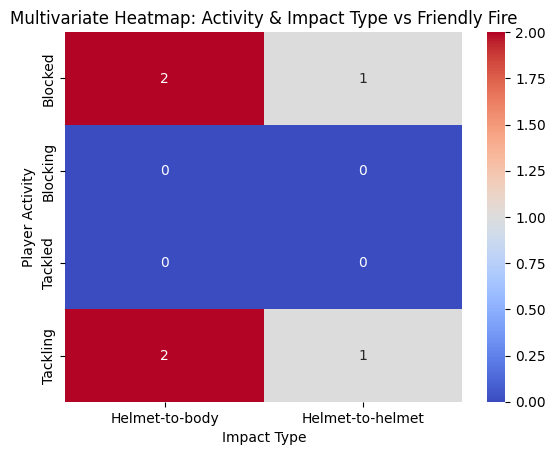

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

heatmap_data = video_data_cleaned.groupby(
    ['Player_Activity_Derived', 'Primary_Impact_Type']
)['Friendly_Fire'].sum().unstack().fillna(0)

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title("Multivariate Heatmap: Activity & Impact Type vs Friendly Fire")
plt.ylabel("Player Activity")
plt.xlabel("Impact Type")
plt.show()

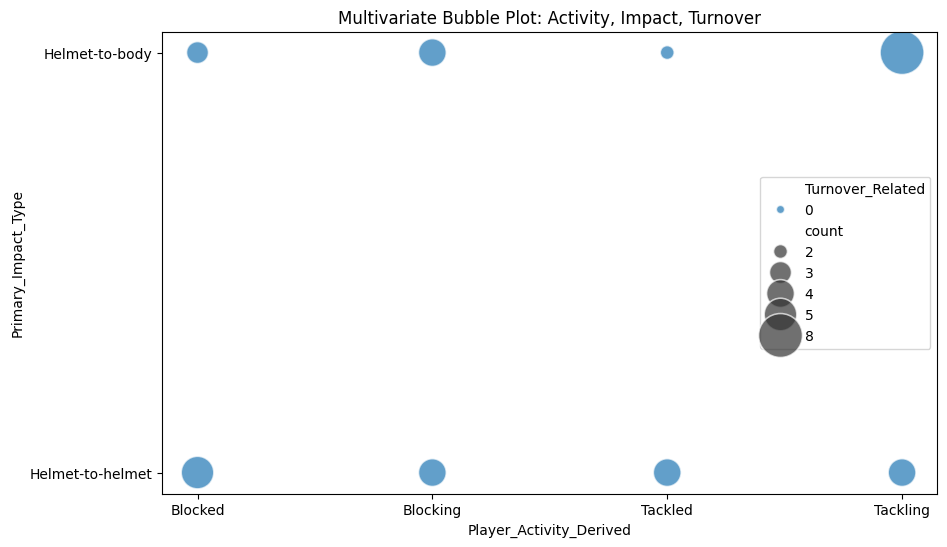

In [50]:
bubble_data = video_data_cleaned.groupby(
    ['Player_Activity_Derived', 'Primary_Impact_Type', 'Turnover_Related']
).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bubble_data,
    x='Player_Activity_Derived',
    y='Primary_Impact_Type',
    size='count',
    hue='Turnover_Related',
    sizes=(100, 1000),
    legend='full',
    alpha=0.7
)
plt.title("Multivariate Bubble Plot: Activity, Impact, Turnover")
plt.show()


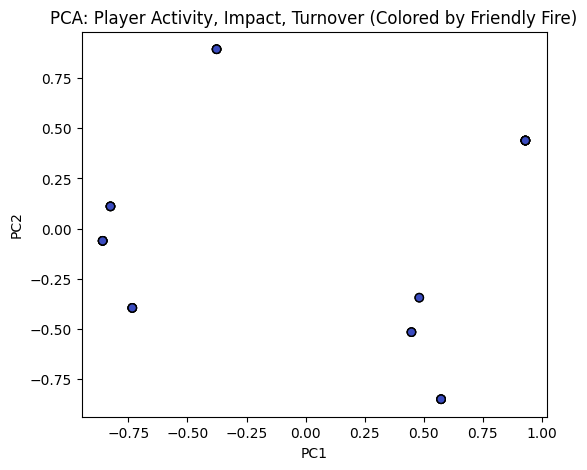

PCA Explained Variance Ratio: [0.43931409 0.22319697]


In [51]:
pca_features = ['Player_Activity_Derived', 'Primary_Impact_Type', 'Turnover_Related']
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(video_data_cleaned[pca_features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_encoded)

plt.figure(figsize=(6, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=video_data_cleaned['Friendly_Fire'], cmap='coolwarm', edgecolor='k')
plt.title("PCA: Player Activity, Impact, Turnover (Colored by Friendly Fire)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, video_data_cleaned['Friendly_Fire'], test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.00      0.00      0.00         4

    accuracy                           0.64        11
   macro avg       0.32      0.50      0.39        11
weighted avg       0.40      0.64      0.49        11



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.00      0.00      0.00         4

    accuracy                           0.64        11
   macro avg       0.32      0.50      0.39        11
weighted avg       0.40      0.64      0.49        11



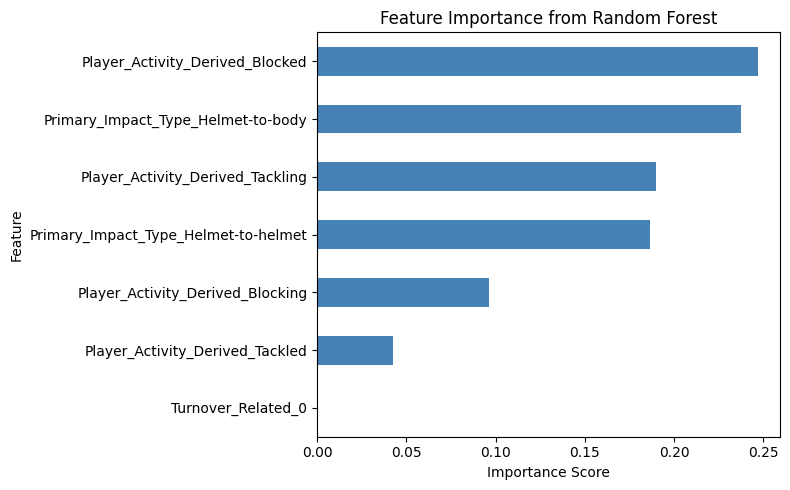

In [54]:
features = ['Player_Activity_Derived', 'Primary_Impact_Type', 'Turnover_Related']
target = 'Friendly_Fire'

encoder = OneHotEncoder()
X = encoder.fit_transform(video_data_cleaned[features])
y = video_data_cleaned[target]

# --- Step 3: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Step 4: Train Random Forest Classifier ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Step 5: Evaluate the Model ---
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# --- Step 6: Feature Importance ---
feature_names = encoder.get_feature_names_out(features)
importances = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)

# --- Step 7: Plot Feature Importances ---
plt.figure(figsize=(8, 5))
importances.plot(kind='barh', color='steelblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()